# Ejercicio PCA (Principal Component Analysis)
En este ejercicio vas a trabajar con un dataset de información de ciudadanos como el estado civil, número de hijos, qué gastos e ingresos tiene, etc...

Se cuenta con un target, que es si el ciudadano va a alquilar o a comprar una vivienda. Para ello,  con PCA

### Importamos librerias
Principales librerías que usarás durante el notebook.

In [1]:
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['figure.figsize'] = (16, 9)
plt.style.use('ggplot')

from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV

from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.neighbors import KNeighborsClassifier

### Cargamos datos de entrada
1. Carga el csv *comprar_alquilar.csv*
2. Obtén la información básica: columnas, dimensiones, descripción de las variables, missings...

In [2]:
df_coal = pd.read_csv('../Practica/data/comprar_alquilar.csv')

In [3]:
df_coal.tail(10)

,ingresos,gastos_comunes,pago_coche,gastos_otros,ahorros,vivienda,estado_civil,hijos,trabajo,comprar
192,4653,1024,447,703,16952,392957,0,0,3,0
193,3390,881,194,584,34601,304112,2,2,5,0
194,2969,623,72,620,29663,289205,2,2,6,0
195,4169,1292,48,333,28503,239872,2,1,7,1
196,4054,1095,371,440,22183,223971,1,0,3,0
197,3831,690,352,488,10723,363120,0,0,2,0
198,3961,1030,270,475,21880,280421,2,3,8,0
199,3184,955,276,684,35565,388025,1,3,8,0
200,3334,867,369,652,19985,376892,1,2,5,0
201,3988,1157,105,382,11980,257580,0,0,4,0


In [11]:
df_coal.columns

Index(['ingresos', 'gastos_comunes', 'pago_coche', 'gastos_otros', 'ahorros',
       'vivienda', 'estado_civil', 'hijos', 'trabajo', 'comprar'],
      dtype='object')

In [6]:
df_coal.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 202 entries, 0 to 201
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   ingresos        202 non-null    int64
 1   gastos_comunes  202 non-null    int64
 2   pago_coche      202 non-null    int64
 3   gastos_otros    202 non-null    int64
 4   ahorros         202 non-null    int64
 5   vivienda        202 non-null    int64
 6   estado_civil    202 non-null    int64
 7   hijos           202 non-null    int64
 8   trabajo         202 non-null    int64
 9   comprar         202 non-null    int64
dtypes: int64(10)
memory usage: 15.9 KB


In [10]:
df_coal.shape

(202, 10)

In [14]:
df_coal.describe()

,ingresos,gastos_comunes,pago_coche,gastos_otros,ahorros,vivienda,estado_civil,hijos,trabajo,comprar
count,202.000000,202.000000,202.000000,202.000000,202.000000,202.000000,202.000000,202.000000,202.000000,202.000000
mean,4958.995050,971.584158,211.742574,515.425743,38749.668317,373349.638614,1.024752,1.232673,4.490099,0.331683
std,1682.862556,272.106351,124.940754,168.103075,17365.231870,136371.525622,0.837184,1.367833,2.535794,0.471988
min,2008.000000,384.000000,0.000000,201.000000,10319.000000,176553.000000,0.000000,0.000000,0.000000,0.000000
25%,3513.750000,766.750000,99.000000,383.250000,24964.250000,274810.000000,0.000000,0.000000,2.000000,0.000000
50%,4947.500000,968.000000,208.500000,522.500000,38523.000000,340783.500000,1.000000,1.000000,5.000000,0.000000
75%,6374.500000,1165.250000,318.750000,656.750000,52150.750000,444482.000000,2.000000,2.000000,7.000000,1.000000
max,7984.000000,1585.000000,448.000000,828.000000,69934.000000,669540.000000,2.000000,4.000000,8.000000,1.000000


In [12]:
df_coal.isnull().sum()

ingresos          0
gastos_comunes    0
pago_coche        0
gastos_otros      0
ahorros           0
vivienda          0
estado_civil      0
hijos             0
trabajo           0
comprar           0
dtype: int64

### Visualicemos las dimensiones
Realiza un análisis univariante. Realiza la gráfica que consideres para cada varaible, diferenciando por colores el target (*comprar*).

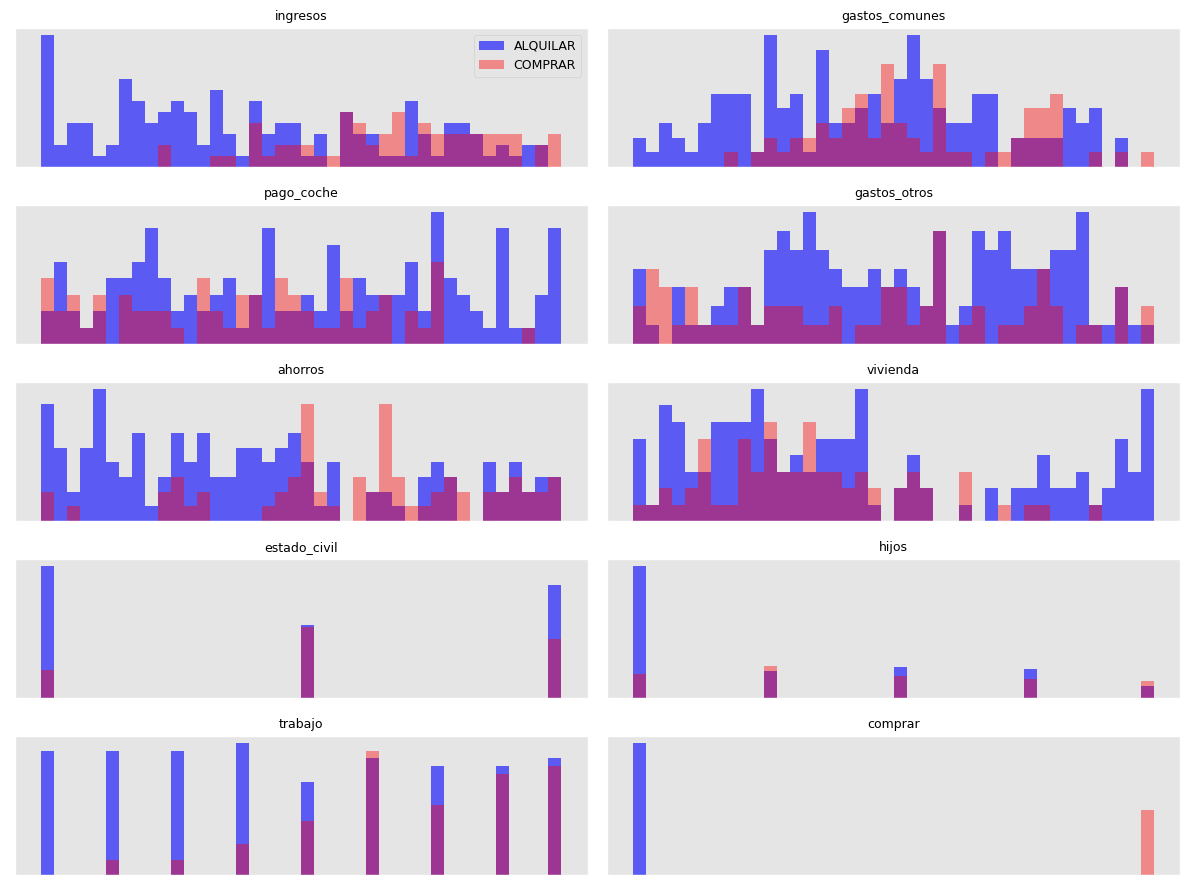

In [27]:
fig,axes =plt.subplots(5, 2, figsize = (12, 9)) 

alquilar= df_coal[df_coal['comprar'] == 0] 
comprar= df_coal[df_coal['comprar'] == 1] 

ax=axes.ravel()
for i in range(len(df_coal.columns)):
  _,bins = np.histogram(df_coal[df_coal.columns[i]],bins = 40)
  ax[i].hist(alquilar.values[:,i],bins=bins,color ='blue', alpha = 0.6)
  ax[i].hist(comprar.values[:,i],bins=bins,color ='red', alpha = 0.4)
  ax[i].set_title(df_coal.columns[i],fontsize = 9)
  ax[i].axes.get_xaxis().set_visible(False)
  ax[i].set_yticks(())
ax[0].legend(['ALQUILAR','COMPRAR'],loc='best',fontsize = 9)

plt.tight_layout()
plt.show()

## Estandariza los datos
Como el objetivo de estos primeros apartados no es encontrar el mejor modelo con el mejor accuracy, por sencillez, no es necesario dividir en train y test.

In [4]:
sc = StandardScaler()

data_df = df_coal.drop(['comprar'], axis=1)

X_sc = sc.fit_transform(data_df)
print(X_sc)

[[ 0.62012866  0.10468863 -1.69895439 ... -1.22708822  0.5623736
  -0.98441983]
 [ 1.0639266  -0.10162457 -0.71204191 ... -0.02963981  1.29527339
   0.59691461]
 [ 0.89117304  0.22626604 -0.91263388 ...  1.1678086  -0.17052619
   1.38758182]
 ...
 [-1.05736798 -0.06109876  0.51558094 ... -0.02963981  1.29527339
   1.38758182]
 [-0.96801269 -0.38530521  1.26178306 ... -0.02963981  0.5623736
   0.201581  ]
 [-0.57842363  0.68310241 -0.85646812 ... -1.22708822 -0.90342598
  -0.19375261]]


## Aplicamos PCA
Aplica el algoritmo de PCA para 9 components, es decir, para todas las features

In [5]:
pca_model = PCA(n_components = 9, random_state = 0)

pca_model.fit(X_sc)

PCA(n_components=9, random_state=0)

In [6]:
print("SHAPE X_pca:", X_sc.shape)

SHAPE X_pca: (202, 9)


### Veamos cuántos buenos predictores son las nuevas dimensiones
Responde a las siguientes preguntas:
1. ¿Cuánta varianza explica cada Principal Component?
2. ¿Y de manera acumulada empezando por el PC1?
3. ¿Cuánta varianza explicarían sólo 5 componentes?

In [8]:
pca_model.explained_variance_

array([2.70561424, 2.10697364, 1.05925553, 0.96649057, 0.87148938,
       0.50920879, 0.37495835, 0.27295496, 0.17783067])

In [14]:
expl = pca_model.explained_variance_ratio_

print(expl)


[0.29913557 0.23294923 0.11711241 0.10685622 0.09635279 0.05629866
 0.04145579 0.03017819 0.01966115]


2. ¿Y de manera acumulada empezando por el PC1?

In [12]:
pca_varianza_acum = pca_model.explained_variance_ratio_.cumsum()

print(pca_varianza_acum)

[0.29913557 0.5320848  0.64919721 0.75605343 0.85240621 0.90870487
 0.95016066 0.98033885 1.        ]


3. ¿Cuánta varianza explicarían sólo 5 componentes?

In [13]:
print('SUMA:',sum(expl[0:5]))

SUMA: 0.8524062117714309


5 componentes explicarían el 85,24%

### Graficamos la variacion explicada acumulada
Representa en un diagrama de lineas la evolución de la varianza acumulada en función de los PC

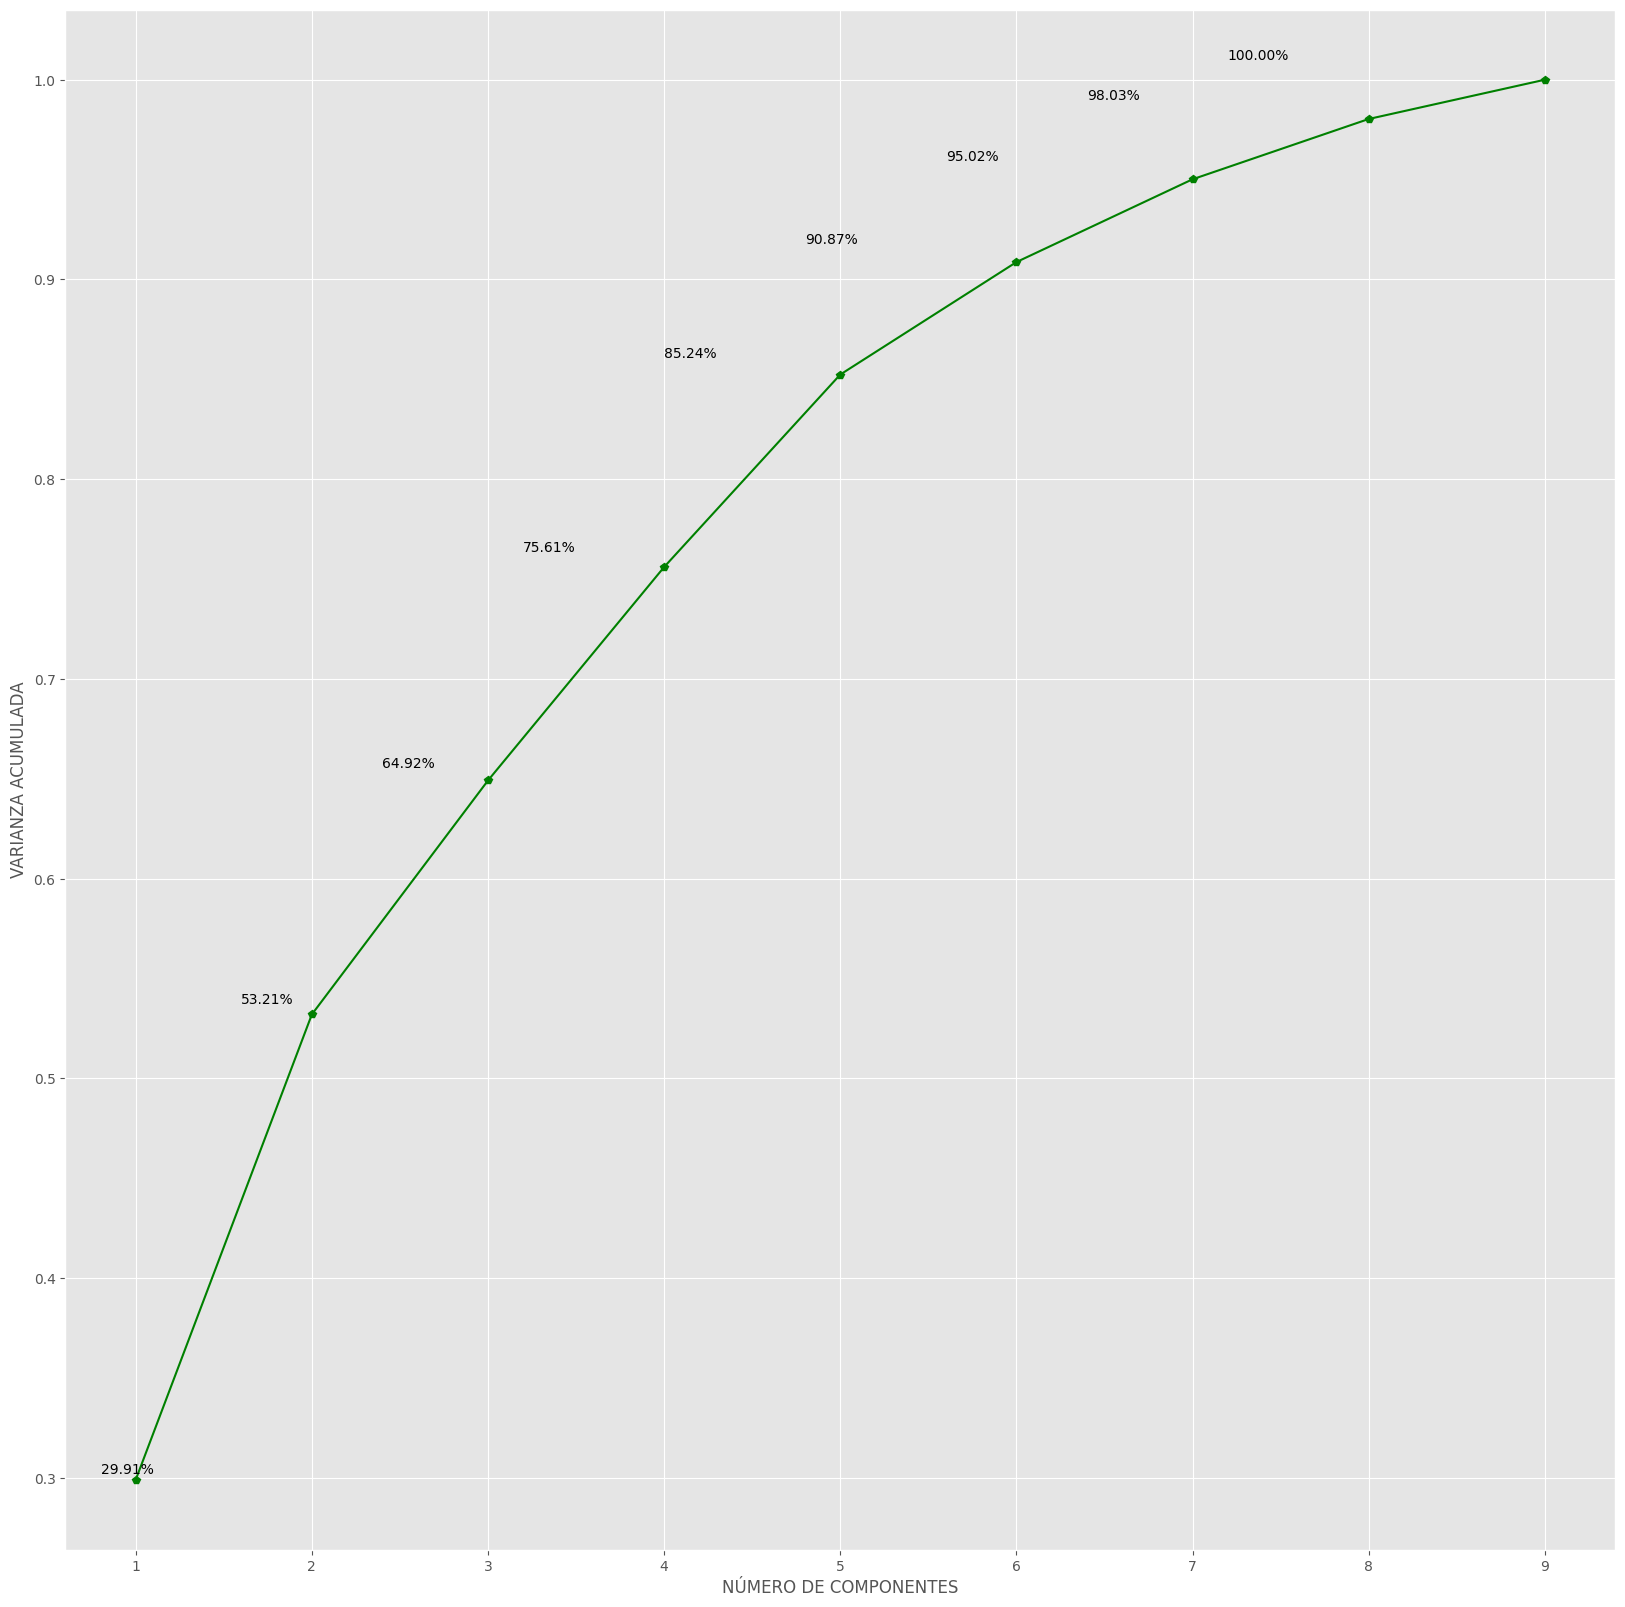

In [19]:
x = np.arange(1, len(df_coal.columns))

plt.figure(figsize = (20, 20))
plt.plot(x, pca_varianza_acum, 'gp-')
plt.xlabel('NÚMERO DE COMPONENTES')
plt.ylabel('VARIANZA ACUMULADA')

for x, y in zip(x, pca_varianza_acum):
    plt.annotate(f'{y:.2%}',
                xy = (0.8 * x, 1.01 * y))

### Veamos la correlación entre las nuevas componentes y las dimensiones originales
Representa en un mapa de calor los PCA vs las variables originales. Esta información la puedes obtener del atributo de PCA *components_*.

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:11: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  # This is added back by InteractiveShellApp.init_path()


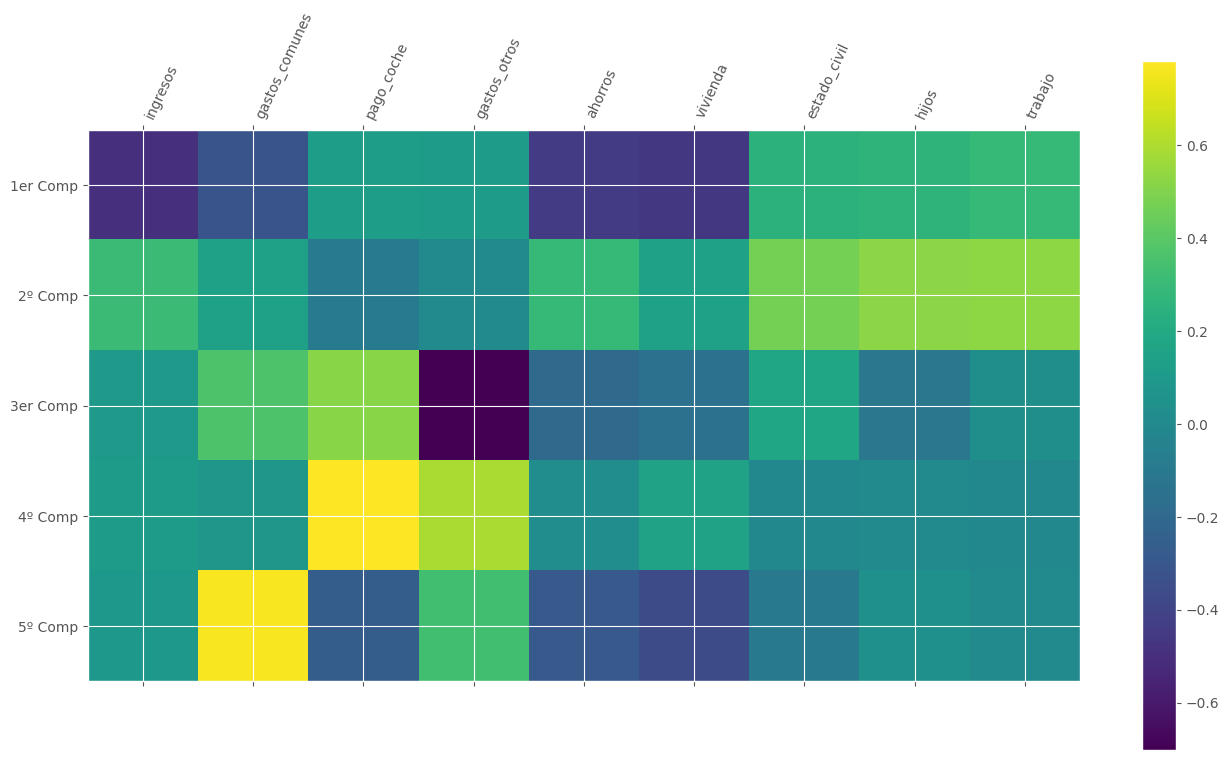

In [58]:
plt.matshow(pca_model.components_[0:5], cmap='viridis' )

plt.yticks([0, 1, 2, 3, 4],['1er Comp','2º Comp','3er Comp','4º Comp','5º Comp'],fontsize = 10)
plt.colorbar()

plt.xticks(range(len(data_df.columns)), 
data_df.columns, 
rotation = 65, 
ha = 'left')

plt.tight_layout()
plt.show(); 

## Predicciones
1. Divide en train y test
2. Prepara un pipeline compuesto por:
    - StandardScaler,
    - PCA de 5 componentes
    - KNN con 3 vecinos
3. Entrena
4. Predice en test
5. Calcula el accuracy score en train y test
6. Representa la matriz de confusión
7. ¿Qué combinación de vecinos y componentes mejoraría el accuracy en test?

In [27]:
sc = StandardScaler()

data_df = df_coal.drop(['comprar'], axis=1)

X_sc = sc.fit_transform(data_df)

In [21]:
df_sc_pca = pd.DataFrame(X_sc, columns = data_df.columns)
df_sc_pca["comprar"] = df_coal["comprar"]

In [22]:
X_train, X_test = train_test_split(df_sc_pca, test_size = 0.2, random_state = 0)

In [23]:
y_train = X_train["comprar"]
y_test = X_test["comprar"]
X_train = X_train.drop(['comprar'], axis=1)
X_test = X_test.drop(['comprar'], axis=1)

In [29]:
print("X_TRAIN:", X_train.shape)
print("X_TEST:", X_test.shape)
print("y_TRAIN:", y_train.shape)
print("y_TEST:", y_test.shape)

X_TRAIN: (161, 9)
X_TEST: (41, 9)
y_TRAIN: (161,)
y_TEST: (41,)


In [26]:
sc = StandardScaler()
pca = PCA(n_components = 5)
knn = KNeighborsClassifier(n_neighbors = 3)


pipe = Pipeline(steps = [("scaler", sc), ("pca", pca), ("knn", knn)])

pipe.fit(X_train, y_train)

Pipeline(steps=[('scaler', StandardScaler()), ('pca', PCA(n_components=5)),
                ('knn', KNeighborsClassifier(n_neighbors=3))])

In [34]:
from sklearn.metrics import accuracy_score

y_hat = pipe.predict(X_test)

acc_sco = accuracy_score(y_true = y_test, y_pred = y_hat)

print(f'LA PRECISIÓN ES DE UN: {acc_sco:.2%}')

LA PRECISIÓN ES DE UN: 80.49%


In [37]:
from yellowbrick.classifier import ConfusionMatrix

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  "X does not have valid feature names, but"


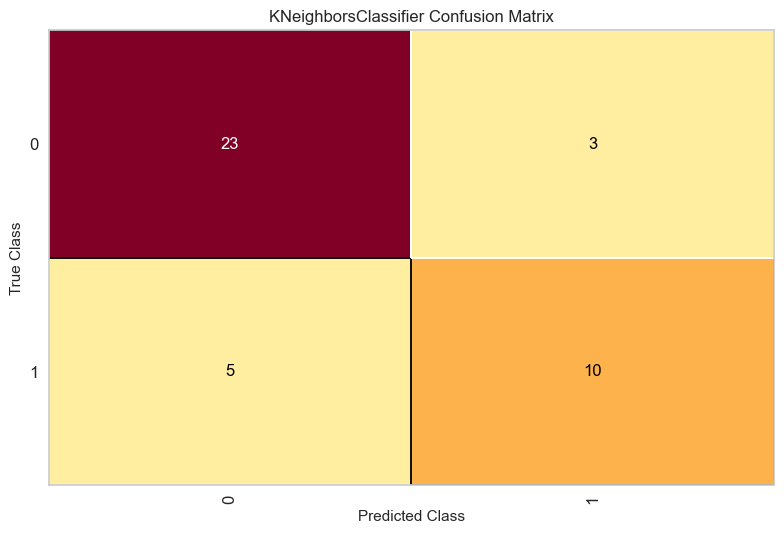

<AxesSubplot:title={'center':'KNeighborsClassifier Confusion Matrix'}, xlabel='Predicted Class', ylabel='True Class'>

In [38]:
conf_ma = ConfusionMatrix(pipe)

conf_ma.fit(X_train, y_train)

conf_ma.score(X_test, y_test)

conf_ma.show()

7. ¿Qué combinación de vecinos y componentes mejoraría el accuracy en test?

La combinación que mejoraría el accuracy seria incrementar tanto los vecinos como los componentes. Más los vecinos que en este caso son 3, subirlos a 5, y los componentes que son 5 en nuestra predicción subirlos un punto mas, o dos.

In [39]:
sc = StandardScaler()
pca = PCA(n_components = 7)
knn = KNeighborsClassifier(n_neighbors = 5)


pipe = Pipeline(steps = [("scaler", sc), ("pca", pca), ("knn", knn)])

pipe.fit(X_train, y_train)

Pipeline(steps=[('scaler', StandardScaler()), ('pca', PCA(n_components=7)),
                ('knn', KNeighborsClassifier())])

In [40]:
from sklearn.metrics import accuracy_score

y_hat = pipe.predict(X_test)

acc_sco = accuracy_score(y_true = y_test, y_pred = y_hat)

print(f'LA PRECISIÓN ES DE UN: {acc_sco:.2%}')

LA PRECISIÓN ES DE UN: 90.24%
